## Select random samples from BC

In [4]:
import pandas as pd
from pathlib import Path
IMC_BC_path = Path('../../../Data/IMC_Breast_cancer_Danenberg_2022/')
cells = pd.read_csv(IMC_BC_path / 'SingleCells.csv')
cells.sample(3)

,ImageNumber,ObjectNumber,metabric_id,cellPhenotype,is_epithelial,is_tumour,is_normal,is_dcis,is_interface,is_perivascular,...,CD31-vWF,CXCL12,HLA-ABC,panCK,c-Caspase3,DNA1,DNA2,Location_Center_X,Location_Center_Y,AreaShape_Area
396630,321,1069,MB-0396,Basal,1,1,0,0,0,0,...,0.539881,0.259584,8.583263,2.395787,0.443767,33.315349,64.358595,145.745283,331.886792,106
521639,419,1589,MB-0486,Endothelial,0,1,0,0,0,1,...,0.486275,0.042389,0.634994,0.301095,0.193036,8.304281,15.950047,369.656250,495.671875,64
275145,216,457,MB-0288,HER2^{+},1,1,0,0,0,0,...,0.443456,1.094492,4.174159,24.941592,0.126298,61.352698,115.302860,372.883721,466.976744,43


In [ ]:
import sys
mosna_path =  '../mosna/'
sys.path.append(mosna_path)
import mosna2 as mosna # scanorama disabled

In [32]:
N_samples = 50
samples_all = cells['ImageNumber'].drop_duplicates()
random_sample = samples_all.sample(n=N_samples, random_state=1) 
print(cells.shape)


(1123466, 53)


In [27]:
idx = cells['ImageNumber'].isin(random_sample)
selected_cells = cells.loc[idx,:]
print(selected_cells.shape)
selected_cells.sample(3)

ImageNumber
False    1050012
True       73454
Name: count, dtype: int64
(73454, 53)


,ImageNumber,ObjectNumber,metabric_id,cellPhenotype,is_epithelial,is_tumour,is_normal,is_dcis,is_interface,is_perivascular,...,CD31-vWF,CXCL12,HLA-ABC,panCK,c-Caspase3,DNA1,DNA2,Location_Center_X,Location_Center_Y,AreaShape_Area
1061090,779,5201,MB-0442,CK^{lo}ER^{lo},1,1,0,0,1,0,...,0.114508,0.131398,2.981598,1.647745,0.069596,11.240244,21.431179,732.219512,899.422764,123
492923,396,1400,MB-0449,Myofibroblasts,0,1,0,0,0,1,...,0.227352,0.004397,0.735039,0.401764,0.077822,3.071894,5.909000,126.500000,579.439394,66
1057049,779,1104,MB-0442,Myofibroblasts,0,1,0,0,0,1,...,1.231106,0.289146,4.336953,0.165665,0.115318,15.447410,29.975885,144.538462,247.435897,78


In [35]:
# selected_cells.to_csv( IMC_BC_path / 'selected_cells_x50.csv')

### Load Clinical data

In [74]:
clinical.sample()

,metabric_id,ERStatus,LymphNodesOrdinal,sizeOrdinal,Grade,ERBB2_pos,yearsToStatus,DeathBreast,isValidation,PAM50,IntClust
metabric_id,,,,,,,,,,,
MB-0175,MB-0175,pos,0,10-20mm,1.0,False,5.943874,0,False,Luminal A,IntClust 6


In [77]:
group_col = 'DeathBreast'

clin_path = Path('../../../Data/IMC_Breast_cancer_Danenberg_2022/')
clinical = pd.read_csv( clin_path / 'IMCClinical.csv')
# clinical.index = clinical['metabric_id']

display(clinical.sample(3))


cells_clin = selected_cells.merge(clinical)
cells_clin.sample(3)

,metabric_id,ERStatus,LymphNodesOrdinal,sizeOrdinal,Grade,ERBB2_pos,yearsToStatus,DeathBreast,isValidation,PAM50,IntClust
99,MB-0174,neg,0,20-50mm,3.0,False,6.469541,0,False,Basal,IntClust 4-
53,MB-0118,neg,0,20-50mm,3.0,NaN,1.503080,1,False,NaN,NaN
251,MB-0378,neg,2-3,20-50mm,3.0,True,7.991786,1,False,HER2,IntClust 5-


,ImageNumber,ObjectNumber,metabric_id,cellPhenotype,is_epithelial,is_tumour,is_normal,is_dcis,is_interface,is_perivascular,...,ERStatus,LymphNodesOrdinal,sizeOrdinal,Grade,ERBB2_pos,yearsToStatus,DeathBreast,isValidation,PAM50,IntClust
3712,48,1094,MB-0350,CD57^{+},0,1,0,0,0,0,...,neg,0,50+mm,3.0,False,3.783710,1,False,Basal,IntClust 10
19548,196,2860,MB-0608,CD38^{+} lymphocytes,0,1,0,0,0,1,...,neg,4-7,20-50mm,3.0,False,5.253936,0,False,Basal,IntClust 10
30908,414,273,MB-0458,Myofibroblasts PDPN^{+},0,1,0,0,0,0,...,pos,2-3,20-50mm,2.0,False,11.047228,0,False,Normal-like,IntClust 4+


In [100]:

# Group by columns 'A' and 'B' and get the size of each group
counts = cells_clin.groupby(['metabric_id','cellPhenotype']).size().unstack(fill_value=0)
ABUND = counts.div(counts.sum(axis=1), axis=0)
# ABUND.index = "ABUND_" + ABUND.index.astype(str)
markers_col = ABUND.columns
ABUND.sample()

cellPhenotype,B cells,Basal,CD15^{+},CD38^{+} lymphocytes,CD4^{+} T cells,CD4^{+} T cells & APCs,CD57^{+},CD8^{+} T cells,CK8-18^{+} ER^{hi},CK8-18^{hi}CXCL12^{hi},...,HER2^{+},Ki67^{+},MHC I & II^{hi},MHC I^{hi}CD57^{+},MHC^{hi}CD15^{+},Macrophages,Macrophages & granulocytes,Myofibroblasts,Myofibroblasts PDPN^{+},T_{Reg} & T_{Ex}
metabric_id,,,,,,,,,,,,,,,,,,,,,
MB-2536,0.002612,0.006792,0.000522,0.002612,0.017764,0.001567,0.0,0.085684,0.0,0.017764,...,0.0,0.0,0.00627,0.0,0.0,0.025601,0.000522,0.152038,0.100836,0.001045


In [101]:
clinical.index = clinical['metabric_id']
clinical = clinical.loc[ ABUND.index, : ]
ABUND[group_col] = clinical[group_col]
ABUND.sample()

cellPhenotype,B cells,Basal,CD15^{+},CD38^{+} lymphocytes,CD4^{+} T cells,CD4^{+} T cells & APCs,CD57^{+},CD8^{+} T cells,CK8-18^{+} ER^{hi},CK8-18^{hi}CXCL12^{hi},...,Ki67^{+},MHC I & II^{hi},MHC I^{hi}CD57^{+},MHC^{hi}CD15^{+},Macrophages,Macrophages & granulocytes,Myofibroblasts,Myofibroblasts PDPN^{+},T_{Reg} & T_{Ex},DeathBreast
metabric_id,,,,,,,,,,,,,,,,,,,,,
MB-3403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005181,0.008636,0.102763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.430052,0.003454,0.0,0


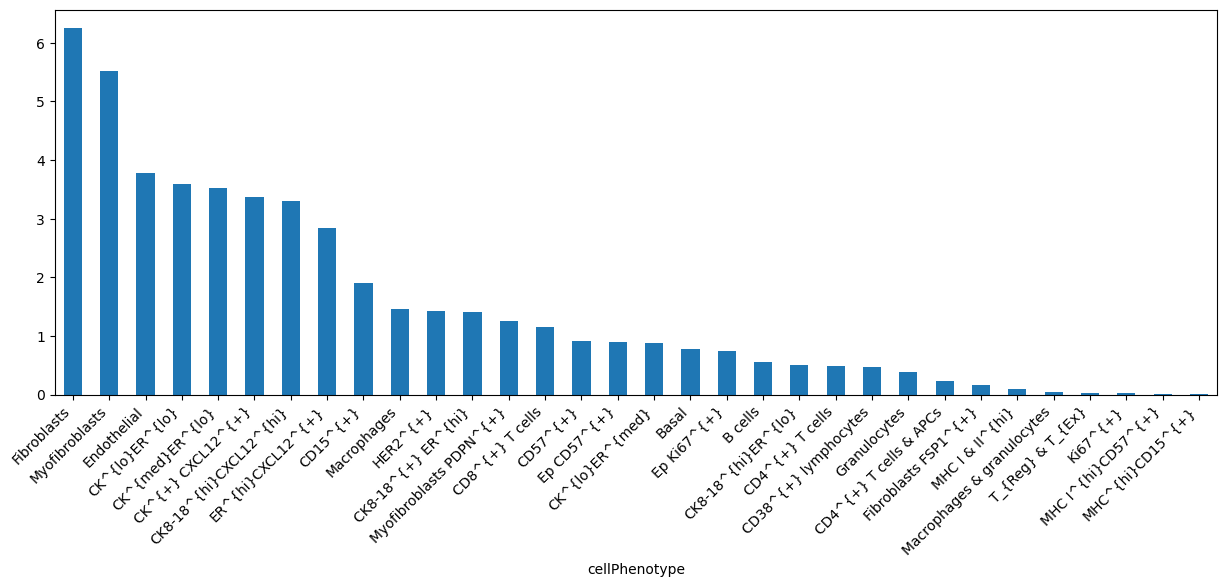

In [102]:
import matplotlib.pyplot as plt

ax = ABUND[markers_col].sum().sort_values(ascending=False).plot.bar(figsize=(15, 5))
plt.xticks(rotation=45, ha='right');

There are 2 significant variables in `pval`


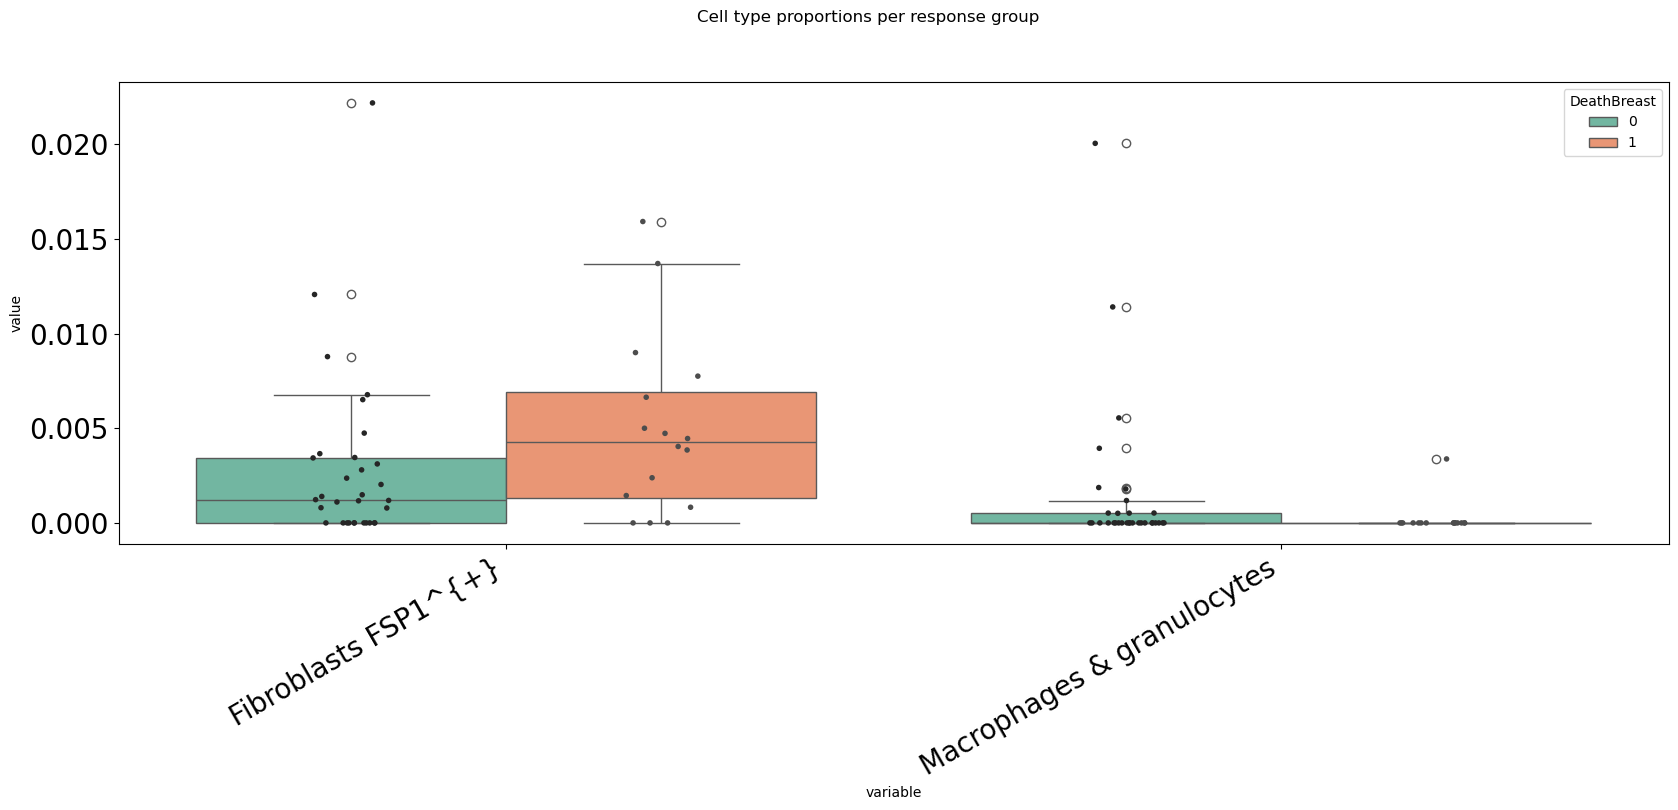

In [110]:
pvals = mosna.find_DE_markers(ABUND, group_ref=0, group_tgt=1, group_var=group_col)

fig, ax = mosna.plot_distrib_groups(
    ABUND, 
    group_var=group_col,
    groups=[0, 1], 
    pval_data=pvals, 
    pval_col='pval', 
    max_cols=-1, 
    multi_ind_to_col=True,
    )
fig.suptitle("Cell type proportions per response group", y=1.0);

In [114]:
RATIOS = mosna.make_composed_variables(ABUND[markers_col], use_col=None, method='ratio', order=2)
RATIOS_cleaned, select_finite = mosna.clean_data(
    RATIOS, 
    method='mixed',
    thresh=0.9,
    )



There are 1049845 non finite values (60.0%)
Imputing data


There are 0 significant variables in `pval`


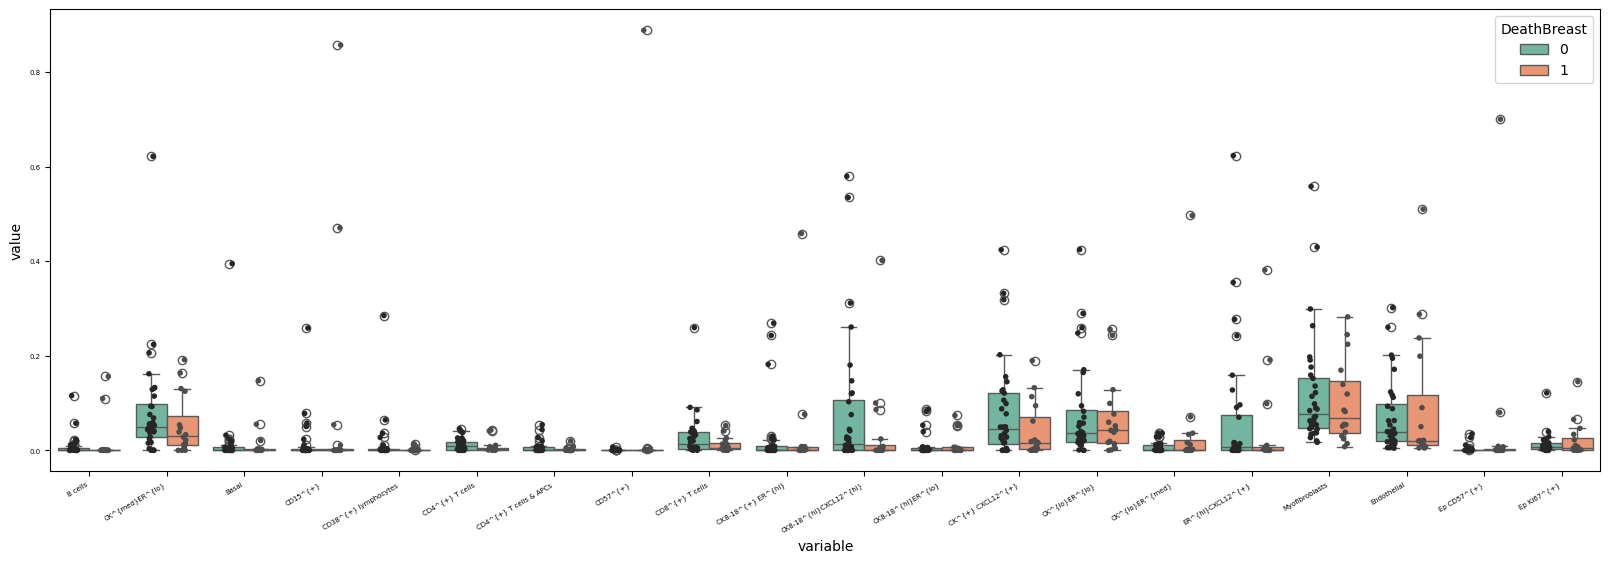

In [115]:
exclude_vars = ['']
Ab_Rt = pd.concat([ABUND, RATIOS_cleaned,], axis=1)

pvals = mosna.find_DE_markers(Ab_Rt, group_ref=0, group_tgt=1, group_var=group_col)

fig, ax = mosna.plot_distrib_groups(
    Ab_Rt, 
    group_var=group_col,
    groups=[0, 1], 
    pval_data=pvals, 
    pval_col='pval', 
    exclude_vars=exclude_vars,
    max_cols=20, fontsize=5, 
    multi_ind_to_col=True,
    )

There are 5087 non finite values (0.3%)
Imputing data
There are 1186 significant variables in `pval`


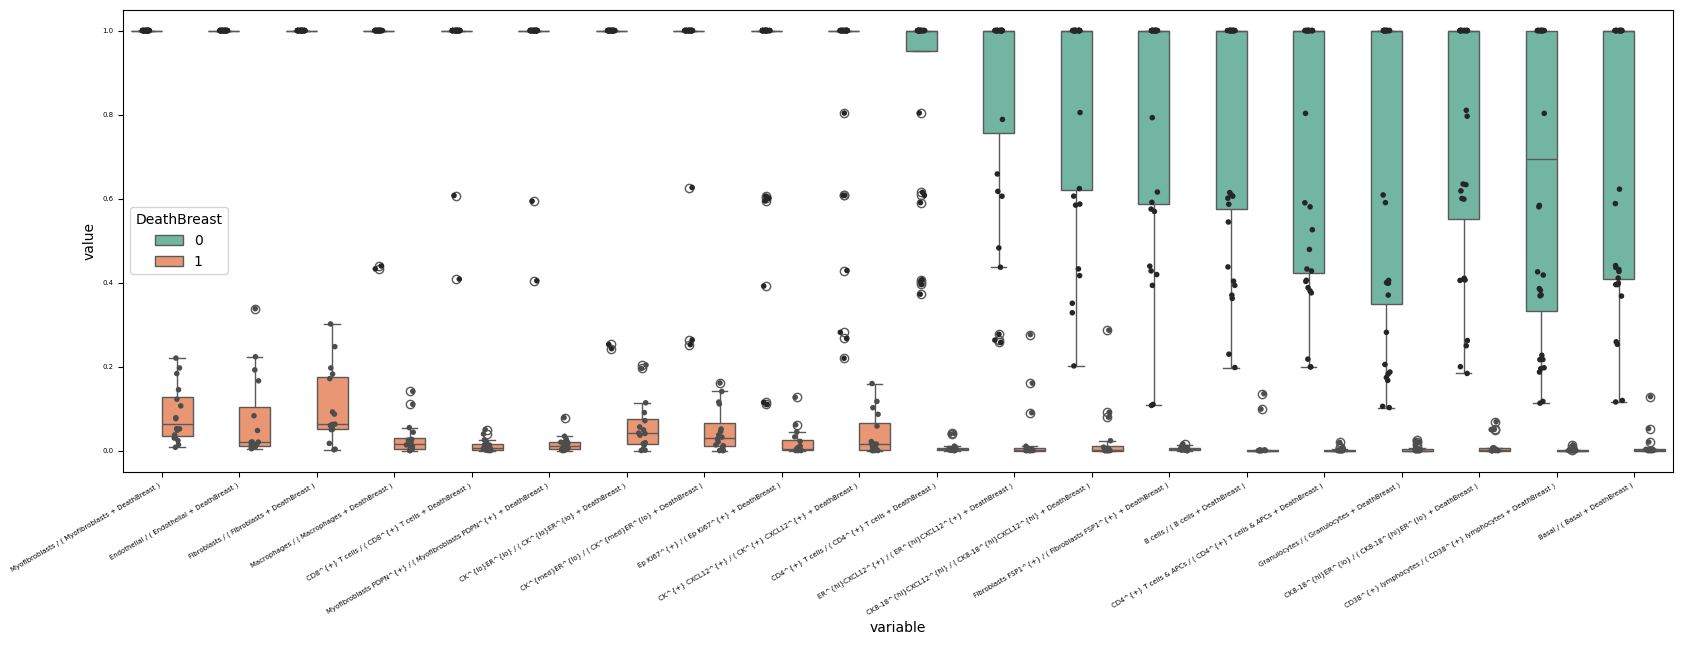

In [130]:
exclude_vars = []
composed_variables = mosna.make_composed_variables(ABUND, method='proportion', order=1)
prop_types_comp = pd.concat([Ab_Rt, composed_variables], axis=1)



prop_types_comp_cleaned, select_finite = mosna.clean_data(
    prop_types_comp, 
    method='mixed',
    thresh=0.9,
    )

pvals = mosna.find_DE_markers(prop_types_comp_cleaned, group_ref=0, group_tgt=1, group_var=group_col)

fig, ax = mosna.plot_distrib_groups(
    prop_types_comp_cleaned, 
    group_var=group_col,
    groups=[0, 1], 
    pval_data=pvals, 
    pval_col='pval', 
    exclude_vars=exclude_vars,
    max_cols=20, fontsize=5, 
    multi_ind_to_col=True,
    )

# Z-Scores

In [146]:
import seaborn as sns
selected_cells.sample()

,ImageNumber,ObjectNumber,metabric_id,cellPhenotype,is_epithelial,is_tumour,is_normal,is_dcis,is_interface,is_perivascular,...,CD31-vWF,CXCL12,HLA-ABC,panCK,c-Caspase3,DNA1,DNA2,Location_Center_X,Location_Center_Y,AreaShape_Area
1056219,779,262,MB-0442,Macrophages,0,1,0,0,0,0,...,0.121607,0.094531,4.238661,0.014694,0.091061,15.642395,31.314697,393.662791,80.011628,86


In [150]:
import os
os.getcwd()

'/home/abdelmounim.essabbar/Projects/mosna_benchmark/benchmarking'

In [154]:
'../../'
ty_path =  '../../tysserand2/tysserand2/'

sys.path.append(ty_path)
import tysserand2 as ty

In [191]:
import importlib
importlib.reload(mosna)

nb_nodes = 0
trim_dist = 200
min_neighbors = 3
sample_col = 'sample'
reconst_dir = Path('./data/processed/IMC_breast_cancer/reconst_dir')
all_reconst_dir = Path('./data/processed/IMC_breast_cancer/all_reconst_dir')
netstat_dir = Path('./data/processed/IMC_breast_cancer/net_stats')
edges_all = pd.DataFrame(data=None, columns=['source', 'target'])
nodes_all = pd.DataFrame(data=None, columns=['sample','x', 'y','celltype'])


grouping = sample_col
n_shuffle = 500
load_dir = reconst_dir
save_dir = load_dir / "assortativity"

pheno_col = 'celltype'

coordinates = selected_cells[['metabric_id','Location_Center_X','Location_Center_Y','cellPhenotype']]
for sample in selected_cells['metabric_id'].unique():
    nodes = coordinates.loc[coordinates['metabric_id'] == sample , :]
    nodes.columns = ['sample','x','y','celltype']
    nodes_all = pd.concat([nodes_all, nodes])
    # sns.scatterplot(coords , x = 'x', y = 'y', hue = 'celltype')
    display(nodes.sample())
    coords = nodes[['x','y']].values
    pairs = ty.build_delaunay(
                coords, 
                node_adaptive_trimming=True, 
                n_edges=3, 
                trim_dist_ratio=2,
                min_dist=0, 
                trim_dist=trim_dist,
                )
    pairs = ty.link_solitaries(
        coords, 
        pairs, 
        min_neighbors=min_neighbors,
        )
    # increase ids in pairs by the number of nodes in all previously loaded networks
    pairs = pairs + nb_nodes
    edges = pd.DataFrame(data=pairs, columns=['source', 'target'])
    edges[sample_col] = sample
    # update number of nodes for next network
    nb_nodes = nb_nodes + coords.shape[0]
    edges.to_csv(reconst_dir / '_'.join( ['edges' , sample , '.csv'] ))
    nodes.to_csv(reconst_dir / '_'.join( ['nodes' , sample , '.csv'] ))
    
    filename = netstat_dir / f'network_interactions_stats_grouping-{grouping}_n_shuffle-{n_shuffle}.csv'

    print("Computing z-scored assortativity")

    net_stats = mosna.groups_assort_mixmat(
        net_dir=reconst_dir, 
        attributes_col=pheno_col, 
        make_onehot=False,
        id_level_1='patient',
        id_level_2='sample', 
        extension='csv',
        n_shuffle=n_shuffle,
        parallel_groups='max',  # or False
        memory_limit='20 GB',
        save_intermediate_results=True)

    print(f"Assortativity took {duration:.3f}s for n_suffle {n_shuffle}")

    net_stats.index = net_stats['id']
    net_stats.drop(columns=['id'], inplace=True)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    net_stats.to_csv(netstat_dir / filename)




all_reconst_dir.to_csv(reconst_dir / 'sample_all-edges.csv', index=False)
all_reconst_dir.to_csv(reconst_dir / 'sample_all-nodes.csv', index=False)

imported


/tmp/ipykernel_2513693/4266527120.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nodes_all = pd.concat([nodes_all, nodes])


,sample,x,y,celltype
11744,MB-0091,333.741176,95.635294,Myofibroblasts


there are 1/1209 nodes with < 3 edges
Computing z-scored assortativity
files: [PosixPath('data/processed/IMC_breast_cancer/reconst_dir/edges_MB-0091_.csv')]
data/processed/IMC_breast_cancer/reconst_dir


/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site

ValueError: No objects to concatenate

In [190]:
reconst_dir.glob(f'edges_*.{extension}')

NameError: name 'extension' is not defined

In [ ]:
trim_dist = 200 # or 'percentile_size'
min_neighbors = 3 # number of nearest nodes to connect for each unconneted node

reconst_dir = processed_dir / f"pretreatment_samples_networks_xy_min_size-{net_size_threshold}_solitary-{min_neighbors}"
save_dir = reconst_dir / "networks_images_common_cmap_saturated_first"
save_dir.mkdir(parents=True, exist_ok=True)
edges_dir = reconst_dir / "edges"
nodes_dir = reconst_dir/ "nodes"